Arturo Sotillo Barraca - 100484973

In [39]:
# -*- coding: utf-8 -*-

# Install pandas if not already installed
#%pip install pandas

import pandas as pd


In [40]:
# Cargar los archivos
available_data = pd.read_csv('Data/attrition_availabledata_10.csv')
competition_data = pd.read_csv('Data/attrition_competition_10.csv')

El primer paso es cargar los datos y obtener un resumen general del dataset, que me permitirá entender cuántas filas y columnas tiene, qué tipos de variables contiene, y si hay valores nulos.

In [41]:
# Ver el tipo de datos y columnas
print(available_data.info())

# Ver las primeras filas para tener una idea de los datos
print(available_data.head())

# Estadísticas descriptivas para variables numéricas
print(available_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2925 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2911 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14  EmployeeID              

Ya que hay columnas con valores faltantes, hay que decidir como manejarlas.

Usaré la mediana para columnas faltantes (JobSatisfaction, WorkLifeBalance, EnvironmentSatisfaction)

In [42]:

# Imputar los valores faltantes con la mediana
available_data['EnvironmentSatisfaction'].fillna(available_data['EnvironmentSatisfaction'].median(), inplace=True)
available_data['JobSatisfaction'].fillna(available_data['JobSatisfaction'].median(), inplace=True)
available_data['WorkLifeBalance'].fillna(available_data['WorkLifeBalance'].median(), inplace=True)
available_data['NumCompaniesWorked'].fillna(available_data['NumCompaniesWorked'].median(), inplace=True)
available_data['TotalWorkingYears'].fillna(available_data['TotalWorkingYears'].median(), inplace=True)


# Verificar si los valores faltantes se han resuelto
print(available_data.isnull().sum())

hrs                        0
absences                   0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64


/var/folders/y8/ss_gg5ds3_s47h8spcs628180000gn/T/ipykernel_58471/1912497357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  available_data['EnvironmentSatisfaction'].fillna(available_data['EnvironmentSatisfaction'].median(), inplace=True)
/var/folders/y8/ss_gg5ds3_s47h8spcs628180000gn/T/ipykernel_58471/1912497357.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work b

Debemos asegurarnos de que las columnas categóricas estén como tipo category, lo que mejora el rendimiento del modelo. También, hemos clasificado las columnas por tipos, como pide el enunciado ( ...son categóricas/ordinales/numéricas...)

In [49]:
# Variables categóricas
categorical_columns = ['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'EducationField']

# Variables ordinales (basadas en el contexto y las etiquetas numéricas)
ordinal_columns = ['JobInvolvement', 'PerformanceRating', 'WorkLifeBalance']

# Variables numéricas (todas las demás que no sean categóricas ni ordinales)
numerical_columns = [col for col in available_data.select_dtypes(include=['float64', 'int64']).columns if col not in categorical_columns + ordinal_columns]

# Convertir las variables categóricas y la variable dependiente 'Attrition' a tipo 'category'
for col in categorical_columns:
    available_data[col] = available_data[col].astype('category')

# Convertir la variable dependiente 'Attrition' a tipo 'category'
available_data['Attrition'] = available_data['Attrition'].astype('category')

# Realizar one-hot encoding de las columnas categóricas
available_data_encoded = pd.get_dummies(available_data, columns=categorical_columns, drop_first=True)

# Verificar los tipos de datos
print(available_data.dtypes)


hrs                         float64
absences                      int64
JobInvolvement                int64
PerformanceRating             int64
EnvironmentSatisfaction     float64
JobSatisfaction             float64
WorkLifeBalance             float64
Age                           int64
BusinessTravel             category
Department                 category
DistanceFromHome              int64
Education                     int64
EducationField             category
Gender                     category
JobLevel                      int64
JobRole                    category
MaritalStatus              category
MonthlyIncome                 int64
NumCompaniesWorked          float64
PercentSalaryHike             int64
StockOptionLevel              int64
TotalWorkingYears           float64
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
Attrition                  category
dtype: object


Despues de haber limpiado la data un poco, vamos a identificar si hay variables categóricas con alta cardinalidad. Si alguna de las variables tiene demasiados valores únicos, se podría considerar eliminarla.

Por ejemplo:
Hay algúnas columnas que son irrelevantes para el análisis y se pueden eliminar. 

· EmployeeCount: Tiene el mismo valor en todas las filas, por lo que no aporta información útil para el modelo.

· EmployeeID: Es un identificador único, lo cual no es útil para el análisis.

· Over18: Todos los empleados tienen 18 años o más, por lo que podemos eliminar esta columna.

In [44]:
# Revisar cuántos valores únicos tiene cada columna categórica
cardinality = available_data[categorical_columns].nunique()
print("Cardinalidad de las variables categóricas:")
print(cardinality)

# Verificar si alguna columna tiene un solo valor único
constant_columns = [col for col in available_data.columns if available_data[col].nunique() == 1]
print(f"Columnas constantes o de ID: {constant_columns}")

# Eliminar columnas constantes o de ID
available_data.drop(constant_columns, axis=1, inplace=True)

# Employee ID no es una variable de interés, por lo que se elimina
available_data.drop(['EmployeeID'], axis=1, inplace=True)


Cardinalidad de las variables categóricas:
BusinessTravel    3
Department        3
Gender            2
JobRole           9
MaritalStatus     3
EducationField    6
dtype: int64
Columnas constantes o de ID: ['EmployeeCount', 'Over18', 'StandardHours']


Es de clasificación, ya que la variable objetivo (Attrition) es una variable categórica con dos clases: "Yes" y "No".
¿Está desbalanceado?: Para verificar si el problema está desbalanceado, revisaré la distribución de la variable Attrition.

Attrition
No     2466
Yes     474
Name: count, dtype: int64


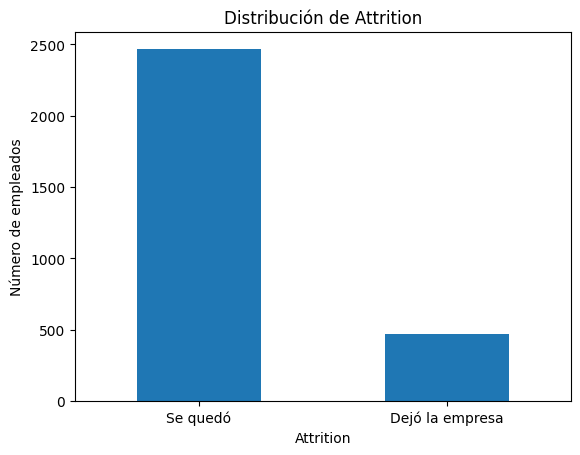

In [45]:
#%pip install matplotlib
import matplotlib.pyplot as plt

# Ver distribución de la variable 'Attrition'
print(available_data['Attrition'].value_counts())

# Visualizar la distribución de 'Attrition'
available_data['Attrition'].value_counts().plot(kind='bar')
plt.title('Distribución de Attrition')
plt.ylabel('Número de empleados')
plt.xticks(ticks=[0, 1], labels=['Se quedó', 'Dejó la empresa'], rotation=0)
plt.show()

El gráfico muestra una distribución desbalanceada, donde la mayoría de los empleados se quedan en la empresa (No), y una minoría deja la empresa (Yes). Este es un problema de clasificación desbalanceada, lo cual significa que:

Los modelos pueden tender a predecir la clase mayoritaria ("No" en este caso) con mayor precisión, pero podrían tener problemas para identificar correctamente a la clase minoritaria ("Yes").

Impacto: El modelo puede no aprender bien sobre la dinámica de los empleados que dejan la empresa, lo que podría ser crítico para hacer predicciones útiles.

Ahora que ya tenemos el EDA simplificado, pasaremos a planificar la evaluación del modelo (dividir los datos, que métricas usar etc.)

In [46]:
# Código para dividir los datos en entrenamiento y prueba
#%pip install scikit-learn
#%pip install sklearn
# Paso 1: Importar las librerías necesarias
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix


# Dividir los datos en train (2/3) y test (1/3)
X = available_data.drop('Attrition', axis=1)  # Características
y = available_data['Attrition']  # Etiqueta (target)

# Realizar la división (2/3 entrenamiento, 1/3 prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Ahora vamos a definir el clasificador Random Forest y los hiperparámetros a ajustar

En este paso, vamos a utilizar el **Random Forest Classifier** como clasificador para el modelo. **Random Forest** es un modelo de aprendizaje supervisado basado en la creación de múltiples árboles de decisión, que luego se combinan para hacer una predicción más robusta. Este modelo es adecuado para tareas de clasificación y es especialmente útil cuando los datos tienen muchas características.

A continuación, definimos los **hiperparámetros** que vamos a ajustar usando **GridSearchCV**:
- **`n_estimators`**: El número de árboles en el bosque. Probamos con 50, 100 y 200 árboles.
- **`max_depth`**: La profundidad máxima de los árboles. Probamos sin límite, 10 y 20.
- **`min_samples_split`**: El número mínimo de muestras necesarias para dividir un nodo. Probamos con 2, 5 y 10.


In [47]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

Usaré **GridSearchCV** para encontrar los mejores hiperparámetros.

**GridSearchCV** es una técnica para ajustar los hiperparámetros de un modelo mediante la búsqueda en un "cuadrícula" de combinaciones posibles. En este caso, probaremos todas las combinaciones de los hiperparámetros definidos anteriormente y seleccionaremos la combinación que proporcione el mejor rendimiento en el conjunto de entrenamiento.

Aquí usamos **5-fold cross-validation** para evaluar el rendimiento del modelo para cada combinación de hiperparámetros. El modelo se evalúa usando la métrica de accuracy.

In [51]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtenemos el mejor modelo
print(f"Mejores parámetros: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/arturosotillobarraca/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arturosotillobarraca/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/arturosotillobarraca/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
  File "/Users/arturosotillobarraca/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/arturosotillobarraca/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
  File "/Users/arturosotillobarraca/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/arturosotillobarraca/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/arturosotillobarraca/Library/Python/3.9/lib/python/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Non-Travel'


Usamos el modelo entrenado con los mejores hiperparámetros para hacer predicciones sobre el conjunto de **prueba (X_test)**. Luego, calculamos varias métricas para evaluar el rendimiento del modelo:

· **Balanced Accuracy**: Esta métrica toma en cuenta el desbalanceo de clases y calcula el promedio de la sensibilidad (TPR) y la especificidad (TNR).

· **Accuracy**: La proporción de predicciones correctas en general.

· **True Positive Rate (TPR)**: La capacidad del modelo para detectar correctamente los casos positivos (empleados que dejaron la empresa).

· **True Negative Rate (TNR)**: La capacidad del modelo para detectar correctamente los casos negativos (empleados que no dejaron la empresa).

In [ ]:
y_pred = best_model.predict(X_test)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

TPR = TP / (TP + FN)  # True Positive Rate (Sensibilidad)
TNR = TN / (TN + FP)  # True Negative Rate (Especificidad)

print(f"Balanced Accuracy: {balanced_acc}")
print(f"Accuracy: {accuracy}")
print(f"TPR (Sensitivity): {TPR}")
print(f"TNR (Specificity): {TNR}")
print(f"Matriz de confusión:\n{cm}")


El ajuste de hiperparámetros (HPO) se llevará a cabo utilizando Cross-Validation (CV) en el conjunto de entrenamiento.
Cross-Validation se utilizará para seleccionar los mejores hiperparámetros y evitar el sobreajuste (overfitting). Una buena opción es usar KFold Cross-Validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Ejemplo con un clasificador como Random Forest
from sklearn.ensemble import RandomForestClassifier

# Definir el clasificador
rf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros para ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores hiperparámetros: {grid_search.best_params_}")


Ahora usaré el conjunto de test (que ha sido separado previamente) para evaluar el rendimiento final del modelo.

In [ ]:
# Evaluar el modelo final usando el conjunto de test
final_model = grid_search.best_estimator_
final_pred = final_model.predict(X_test)

# Calcular métricas finales
final_balanced_acc = balanced_accuracy_score(y_test, final_pred)
final_accuracy = accuracy_score(y_test, final_pred)

final_cm = confusion_matrix(y_test, final_pred)
final_TPR = final_cm[1, 1] / (final_cm[1, 1] + final_cm[1, 0])
final_TNR = final_cm[0, 0] / (final_cm[0, 0] + final_cm[0, 1])

print(f"Final Balanced Accuracy: {final_balanced_acc}")
print(f"Final Accuracy: {final_accuracy}")
print(f"Final TPR: {final_TPR}")
print(f"Final TNR: {final_TNR}")
print(f"Final Confusion Matrix:\n{final_cm}")